In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
data=pd.read_csv('../../_data/8_features_c2db.csv')
data

,dosef,energy,natom,mass,fmax,smax,hform,volume,gap
0,0.000000,-34.420158,8,847.104000,0.000441,0.000025,-0.242520,554.583570,0.198787
1,0.598768,-51.326923,7,228.473000,0.006010,0.000092,-1.486560,210.204206,0.000000
2,4.600808,-16.355219,6,439.664400,0.003162,0.000085,0.108463,399.866678,0.000000
3,0.000000,-8.558619,3,461.008940,0.008155,0.000085,-0.614540,334.657508,1.577069
4,3.637586,-28.363150,4,149.864388,0.002523,0.000387,-0.414287,252.368393,0.000000
...,...,...,...,...,...,...,...,...,...
3124,1.323916,-15.026721,4,468.040000,0.004763,0.000051,-0.244180,285.195232,0.000000
3125,0.000000,-7.553420,3,136.280000,0.000792,0.000098,-0.933140,189.425118,3.433530
3126,1.648949,-13.393534,4,382.292000,0.001311,0.000495,0.092117,299.403874,0.000000
3127,0.868643,-18.481966,3,129.220806,0.005338,0.002498,-2.634989,155.753470,0.000000


In [3]:
# Labelling 

data['is_metal'] = 0

data.loc[data['gap'] > 0, 'is_metal'] = 0 # non-metal
data.loc[data['gap'] <= 0, 'is_metal'] = 1 # metal

In [4]:
df = data.values
df = np.array(df)

In [5]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=0)

x_train = np.array(data_train)
x_test = np.array(data_test)

NegativeCount = 0
PositiveCount = 0
for i in range(len(x_train)):
    if x_train[i][9]==0 :
        NegativeCount=NegativeCount+1
    if x_train[i][9]==1:
        PositiveCount=PositiveCount+1

positives = np.zeros((PositiveCount,10))
negatives = np.zeros((NegativeCount,10))
    
j, k = 0, 0
    
for i in range(len(x_train)):

    if(x_train[i,9] == 1):
        positives[j,:] = x_train[i,:]
        j=j+1
    if(x_train[i,9] == 0):
        negatives[k,:] = x_train[i,:]
        k=k+1

# Labels.

y_train = np.zeros(len(x_train))
y_test = np.zeros(len(x_test))

for i in range(len(x_test)):
    y_test[i] = x_test[i][9]
    x_test[i][9] = 1

for i in range(len(x_train)):
    y_train[i] = x_train[i][9]
    x_train[i][9] = 1

# Dropping 'gap' and 'is_metal'.

x_train = np.delete(x_train, 9, 1)
x_test = np.delete(x_test, 9, 1)

x_train = np.delete(x_train, 8, 1)
x_test = np.delete(x_test, 8, 1)

In [6]:
lr = LogisticRegression(max_iter = 999999999)
lr.fit(x_train, y_train)
lr_test_predict = lr.predict(x_test)
conf_mat = confusion_matrix(y_test, lr_test_predict)
accuracy = 100*accuracy_score(y_test, lr_test_predict)

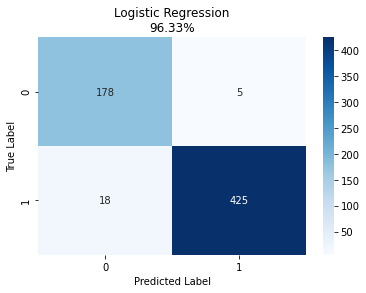

In [7]:
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression\n' + "{:.2f}".format(accuracy) + '%')
plt.savefig('../../plots/c2db_plots/logistic_classifier.pdf')

TN, FP, FN, TP = conf_mat.ravel()

In [8]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_test_predict = dtc.predict(x_test)
conf_mat = confusion_matrix(y_test, dtc_test_predict)
accuracy = 100*accuracy_score(y_test, dtc_test_predict)

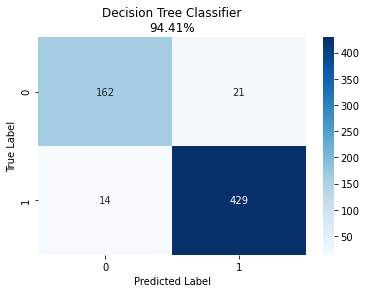

In [9]:
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Classifier\n' + "{:.2f}".format(accuracy) + '%')
plt.savefig('../../plots/c2db_plots/decision_tree_classifier.pdf')

TN, FP, FN, TP = conf_mat.ravel()

In [10]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_test_predict = rfc.predict(x_test)
conf_mat = confusion_matrix(y_test, rfc_test_predict)
accuracy = 100*accuracy_score(y_test, rfc_test_predict)

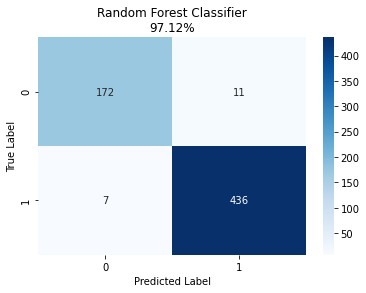

In [11]:
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Classifier\n' + "{:.2f}".format(accuracy) + '%')
plt.savefig('../../plots/c2db_plots/random_forest_classifier.pdf')

TN, FP, FN, TP = conf_mat.ravel()

In [12]:
svc = SVC(probability = True)
svc.fit(x_train, y_train)
svc_test_predict = svc.predict(x_test)
conf_mat = confusion_matrix(y_test, svc_test_predict)
accuracy = 100*accuracy_score(y_test, svc_test_predict)

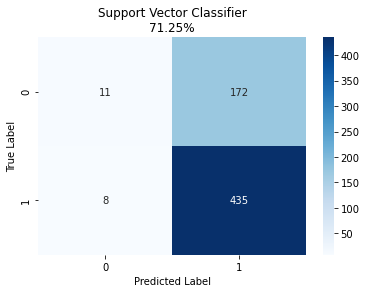

In [13]:
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Support Vector Classifier\n' + "{:.2f}".format(accuracy) + '%')
plt.savefig('../../plots/c2db_plots/svc_classifier.pdf')

TN, FP, FN, TP = conf_mat.ravel()